In [ ]:
import pandas as pd
df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
134,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31,15.6
461,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65,17.7


# 1. Split data: train - validate - test

# Jawaban No.1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat dataset
try:
    data = pd.read_csv('boston.csv')
except FileNotFoundError:
    print("Error: File 'boston.csv' tidak ditemukan. Pastikan file tersebut ada di direktori yang sama.")
    exit()

# Memisahkan fitur (X) dan target (y)
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = data.iloc[:, -1]   # Kolom terakhir

# Membagi data menjadi set pelatihan dan set sementara
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # 60% pelatihan, 40% sementara

# Membagi set sementara menjadi set validasi dan set pengujian
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 50% validasi, 50% pengujian


# Mencetak bentuk dari dataset yang dihasilkan untuk memverifikasi pembagian
print("Bentuk X_train:", X_train.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk X_val:", X_val.shape)
print("Bentuk y_val:", y_val.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_test:", y_test.shape)

Bentuk X_train: (303, 13)
Bentuk y_train: (303,)
Bentuk X_val: (101, 13)
Bentuk y_val: (101,)
Bentuk X_test: (102, 13)
Bentuk y_test: (102,)


# 2. Draw correlation plot on training data and perform feature selection on highly correlated features

# JAWABAN NO.2

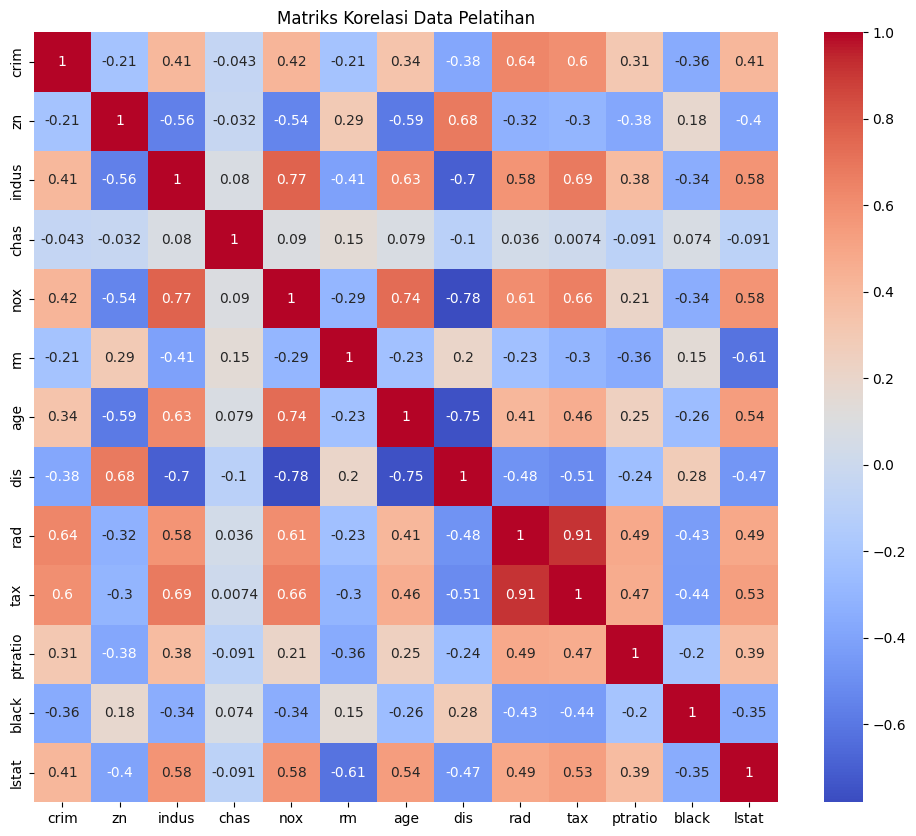


Fitur-fitur yang sangat berkorelasi (di atas 0.7 ): {'age', 'nox', 'tax', 'dis'}

Ukuran data setelah seleksi fitur:
X_train: (303, 9)
X_val: (101, 9)
X_test: (102, 9)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Memuat data dan membagi data menjadi training, validation, dan testing set.
try:
    data = pd.read_csv('boston.csv')
except FileNotFoundError:
    print("Error: File 'boston.csv' tidak ditemukan. Pastikan file ada di direktori yang sama.")
    exit()

X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir (variabel target)
y = data.iloc[:, -1]   # Kolom terakhir (variabel target)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# 2. Menghitung matriks korelasi dari data pelatihan.
corr_matrix = X_train.corr()

# 3. Menggambar plot heatmap matriks korelasi.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # annot=True untuk menampilkan nilai korelasi
plt.title('Matriks Korelasi Data Pelatihan')
plt.show()

# 4. Seleksi fitur berdasarkan korelasi tinggi.
# Tentukan ambang batas korelasi.  Nilai ini perlu disesuaikan tergantung konteks masalah.
threshold = 0.7

# Cari fitur-fitur yang berkorelasi tinggi.
# Kita hanya memeriksa setengah atas matriks karena matriks korelasi simetris.
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold: # Menggunakan nilai absolut untuk korelasi positif dan negatif
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print("\nFitur-fitur yang sangat berkorelasi (di atas", threshold, "):", correlated_features)


# 5. Menghapus fitur yang berkorelasi tinggi.
# PERHATIAN:  Menghapus fitur secara langsung berdasarkan korelasi tinggi bisa berbahaya!
# Ini merupakan penyederhanaan.  Teknik yang lebih baik seperti PCA (Principal Component Analysis)
# biasanya digunakan untuk menangani multikolinearitas.

# Contoh sederhana: Menghapus fitur yang pertama kali muncul dalam set correlated_features.
# Ini BUKAN pendekatan yang selalu tepat dan perlu disesuaikan dengan pemahaman domain.
features_to_remove = list(correlated_features)
X_train_selected = X_train.drop(columns=features_to_remove)
X_val_selected = X_val.drop(columns=features_to_remove)
X_test_selected = X_test.drop(columns=features_to_remove)


print("\nUkuran data setelah seleksi fitur:")
print("X_train:", X_train_selected.shape)
print("X_val:", X_val_selected.shape)
print("X_test:", X_test_selected.shape)

# 3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10])
## a. Ridge regression
## b. LASSO

# Jawaban No.3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Asumsikan kita sudah memiliki X_train, y_train, X_val, y_val, X_test, y_test

try:
    data = pd.read_csv('boston.csv')
except FileNotFoundError:
    print("Error: File 'boston.csv' tidak ditemukan. Pastikan file ada di direktori yang sama.")
    exit()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


lambdas = [0.01, 0.1, 1, 10]

# a. Ridge Regression
ridge_models = {}
for l in lambdas:
    model = Ridge(alpha=l)  # alpha adalah parameter lambda dalam Ridge Regression
    model.fit(X_train, y_train)
    ridge_models[l] = model
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"Ridge Regression (lambda={l}): MSE pada data validasi = {mse}")


# b. Lasso Regression
lasso_models = {}
for l in lambdas:
    model = Lasso(alpha=l) # alpha adalah parameter lambda dalam Lasso Regression
    model.fit(X_train, y_train)
    lasso_models[l] = model
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"Lasso Regression (lambda={l}): MSE pada data validasi = {mse}")

# Evaluasi pada data test (opsional, untuk melihat performa generalisasi)
# Contoh untuk Ridge dengan lambda=1:
best_ridge_model = ridge_models[1] # Pilih model terbaik berdasarkan MSE pada data validasi
y_pred_test = best_ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"\nRidge Regression (lambda=1): MSE pada data test = {mse_test}")

Ridge Regression (lambda=0.01): MSE pada data validasi = 18.607435366182052
Ridge Regression (lambda=0.1): MSE pada data validasi = 18.64811584240098
Ridge Regression (lambda=1): MSE pada data validasi = 18.977328076898353
Ridge Regression (lambda=10): MSE pada data validasi = 19.111691694274526
Lasso Regression (lambda=0.01): MSE pada data validasi = 18.680038265194522
Lasso Regression (lambda=0.1): MSE pada data validasi = 19.187430335805857
Lasso Regression (lambda=1): MSE pada data validasi = 21.207934692767523
Lasso Regression (lambda=10): MSE pada data validasi = 31.870650627607063

Ridge Regression (lambda=1): MSE pada data test = 25.85430754186588


# 4. Choose the best lambda from the validation set
# a. Use RMSE as metric
# b. Interpret a sample of the coefficients of the best model
## i. Ridge regression
## ii. LASSO

# Jawaban No.4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

# a. Memilih lambda terbaik berdasarkan RMSE pada data validasi

# Ridge Regression
ridge_rmse = {}
for l, model in ridge_models.items():
    y_pred = model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_pred))
    ridge_rmse[l] = rmse

best_lambda_ridge = min(ridge_rmse, key=ridge_rmse.get)
print(f"\nRidge Regression: Lambda terbaik ({best_lambda_ridge}) dengan RMSE = {ridge_rmse[best_lambda_ridge]}")


# Lasso Regression
lasso_rmse = {}
for l, model in lasso_models.items():
    y_pred = model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_pred))
    lasso_rmse[l] = rmse

best_lambda_lasso = min(lasso_rmse, key=lasso_rmse.get)
print(f"\nLasso Regression: Lambda terbaik ({best_lambda_lasso}) dengan RMSE = {lasso_rmse[best_lambda_lasso]}")


# b. Menginterpretasi koefisien dari model terbaik

# i. Ridge Regression
best_ridge_model = ridge_models[best_lambda_ridge]
coefficients_ridge = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': best_ridge_model.coef_})
print("\nKoefisien Ridge Regression (model terbaik):")
print(coefficients_ridge)


# ii. Lasso Regression
best_lasso_model = lasso_models[best_lambda_lasso]
coefficients_lasso = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': best_lasso_model.coef_})
print("\nKoefisien Lasso Regression (model terbaik):")
print(coefficients_lasso)

# Contoh interpretasi:
# Koefisien positif menunjukkan hubungan positif antara fitur dan variabel target.
# Koefisien negatif menunjukkan hubungan negatif.
# Besarnya koefisien menunjukkan kekuatan hubungan.
# Koefisien mendekati nol menunjukkan hubungan yang lemah atau tidak ada hubungan.


Ridge Regression: Lambda terbaik (0.01) dengan RMSE = 4.313633661564465

Lasso Regression: Lambda terbaik (0.01) dengan RMSE = 4.322040983747669

Koefisien Ridge Regression (model terbaik):
    Feature  Coefficient
0      crim    -0.113371
1        zn     0.038013
2     indus     0.029283
3      chas     3.508861
4       nox   -14.282443
5        rm     3.805334
6       age    -0.018106
7       dis    -1.487166
8       rad     0.252648
9       tax    -0.010043
10  ptratio    -0.884745
11    black     0.010847
12    lstat    -0.576255

Koefisien Lasso Regression (model terbaik):
    Feature  Coefficient
0      crim    -0.110635
1        zn     0.038290
2     indus     0.014641
3      chas     3.337629
4       nox   -10.767035
5        rm     3.790309
6       age    -0.020859
7       dis    -1.431073
8       rad     0.245163
9       tax    -0.010394
10  ptratio    -0.850248
11    black     0.010883
12    lstat    -0.584921


# 5. Evaluate the best models on the test data (+ interpretation)
## a. MAE
## b. MAPE
## c. RMSE

# Jawaban no.5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


def mean_absolute_percentage_error(y_true, y_pred):
    """Menghitung Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Evaluasi Ridge Regression pada data uji
y_pred_ridge = best_ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print("Ridge Regression - Evaluasi Data Uji:")
print(f"MAE: {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"MAPE: {mape_ridge:.2f}%")


# Evaluasi Lasso Regression pada data uji
y_pred_lasso = best_lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

print("\nLasso Regression - Evaluasi Data Uji:")
print(f"MAE: {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"MAPE: {mape_lasso:.2f}%")


# Interpretasi:

print("\nInterpretasi:")
print("Nilai MAE, RMSE, dan MAPE yang lebih rendah menunjukkan kinerja model yang lebih baik.")
print("MAE mewakili rata-rata selisih absolut antara nilai prediksi dan nilai aktual.")
print("RMSE lebih sensitif terhadap pencilan daripada MAE, memberikan penalti lebih besar pada kesalahan yang lebih besar.")
print("MAPE menyatakan rata-rata kesalahan persentase, berguna untuk membandingkan model di berbagai dataset dengan skala yang berbeda.")

# Bandingkan kinerja Ridge dan Lasso berdasarkan metrik. Pertimbangkan metrik mana yang paling penting untuk aplikasi spesifik.

Ridge Regression - Evaluasi Data Uji:
MAE: 3.40
RMSE: 5.00
MAPE: 18.76%

Lasso Regression - Evaluasi Data Uji:
MAE: 3.40
RMSE: 5.04
MAPE: 18.70%

Interpretasi:
Nilai MAE, RMSE, dan MAPE yang lebih rendah menunjukkan kinerja model yang lebih baik.
MAE mewakili rata-rata selisih absolut antara nilai prediksi dan nilai aktual.
RMSE lebih sensitif terhadap pencilan daripada MAE, memberikan penalti lebih besar pada kesalahan yang lebih besar.
MAPE menyatakan rata-rata kesalahan persentase, berguna untuk membandingkan model di berbagai dataset dengan skala yang berbeda.
